# IMPORTACIÓN DE LIBRERIAS Y CONJUNTO DE DATOS

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
import tabulate
from tabulate import tabulate

In [31]:
motores_unicos = pd.read_excel('/content/Motores_Unicos.xlsx')

In [32]:
len(motores_unicos)

320

# EJECUTAMIENTO DE K - MEANS

SELECCIÓN DE VARIABLES

In [33]:
# Seleccionar las columnas 'R.P.M' y 'POTENCIA (HP)' para el clustering
X = motores_unicos[['R.P.M', 'POTENCIA (HP)']]

# Escalar los datos para que todas las características tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

SELECCIÓN DEL K OPTIMO

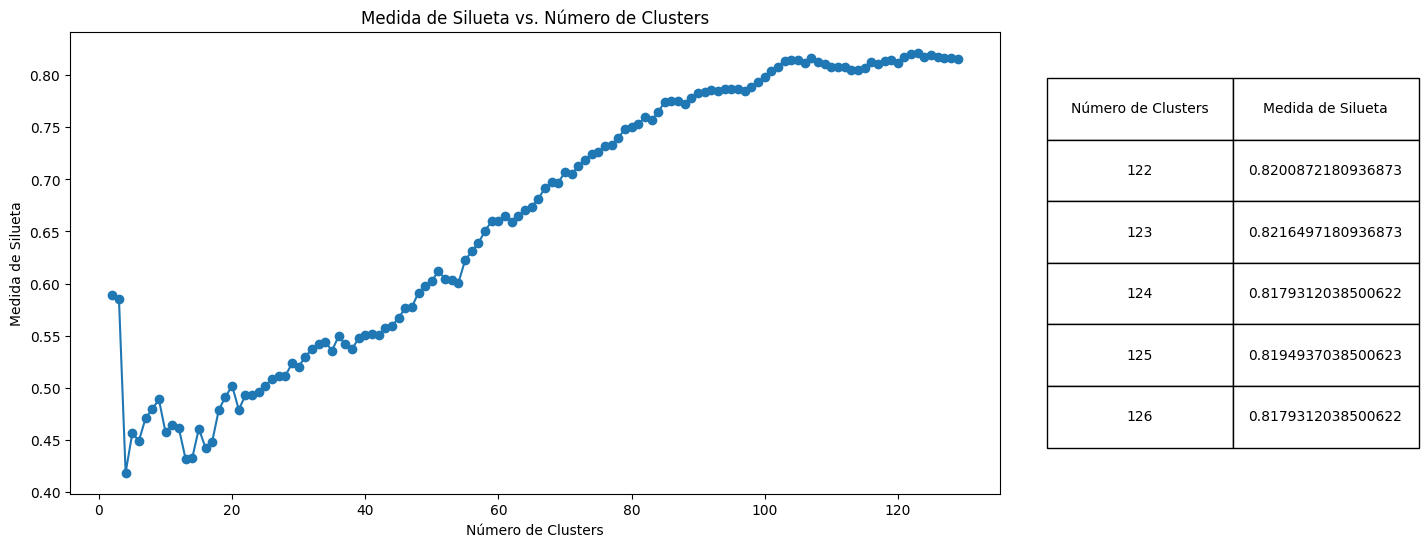

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Crear una lista para almacenar los valores de la medida de silueta para diferentes números de clusters
silhouette_scores = []

# Iterar sobre un rango de números de clusters
for n_clusters in range(2, 130):  # Puedes ajustar el rango según sea necesario
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Crear un gráfico de la medida de silueta vs. número de clusters
plt.figure(figsize=(12, 6))  # Aumentar el tamaño de la figura
plt.plot(range(2, 130), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Medida de Silueta')
plt.title('Medida de Silueta vs. Número de Clusters')

# Encontrar los índices de los 5 valores más altos de la medida de silueta
top_5_indices = np.argsort(silhouette_scores)[-5:]  # Obtiene los índices de los 5 máximos
top_5_indices.sort()  # Ordenar para etiquetar en el orden correcto

# Crear una tabla con los mejores 5 clusters
top_5_clusters = [index + 2 for index in top_5_indices]  # Ajustar los números de clusters
top_5_values = [silhouette_scores[index] for index in top_5_indices]  # Valores de la medida de silueta

# Agregar la tabla al gráfico
table_data = [["Número de Clusters", "Medida de Silueta"]] + list(zip(top_5_clusters, top_5_values))
table = plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='right', bbox=[1.05, 0.1, 0.4, 0.8])

# Formato de la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

plt.show()

APLICACION DE K MEANS

In [35]:
# Realizar el clustering K-Means con un número determinado de clusters
kmeans = KMeans(n_clusters=123, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=123, random_state=42)

AÑADIR ETIQUETAS AL CONJUNTO DE DATOS DE MOTORES UNICOS

In [36]:
# Obtener las etiquetas de cluster para cada motor
motores_unicos['Cluster'] = kmeans.labels_

# Imprimir el DataFrame con la columna 'Cluster' agregada
print(motores_unicos)

    ID_Motor  R.P.M  POTENCIA (HP)  VOLTAJE   FRAME           MARCA   \
0       M001   1480            3.0      575   184-T              WEG   
1       M002   1450            1.0      575   145-T   ALLIS CHALMERS   
2       M003   1420            3.0      575  S/DATO           LENZE    
3       M004   1455            3.0      575   132-M           S/DATO   
4       M005   1450           10.0      550   254-T   ALLIS CHALMERS   
..       ...    ...            ...      ...     ...              ...   
315     M316   1475           40.0      575   326-T  U.S. ELECTRICAL   
316     M317   1470           13.0      575  S/DATO             ASEA   
317     M318   1470           30.0      575  S/DATO             ASEA   
318     M319   1465           50.0      550   364-T   ALLIS CHALMERS   
319     M320   1455           40.0      575   225-S             TECO   

     CANTIDAD  Cluster  
0           1       35  
1           1      101  
2           1       53  
3           1      116  
4         

# METRICAS DE DESEMPEÑO

In [37]:
# Inercia
# Índice de Silueta
# Criterio de Davies-Bouldin
# Coeficiente de Calinski-Harabasz

# Calcular las métricas de desempeño
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
davies_bouldin_idx = davies_bouldin_score(X_scaled, kmeans.labels_)

# Calcular la inercia
inertia = kmeans.inertia_

# Calcular el coeficiente de Calinski-Harabasz
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans.labels_)

# Crear una tabla con las métricas de desempeño
metricas = pd.DataFrame({
    'Métrica': ['Inercia', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'],
    'Valor': [inertia, silhouette_avg, davies_bouldin_idx, calinski_harabasz]
})

print(metricas)

                   Métrica          Valor
0                  Inercia       0.009738
1         Silhouette Score       0.821650
2     Davies-Bouldin Index       0.082922
3  Calinski-Harabasz Score  106121.613016


# VISUALIZACIÓN DE CLUSTERS

GRAFICO 2D

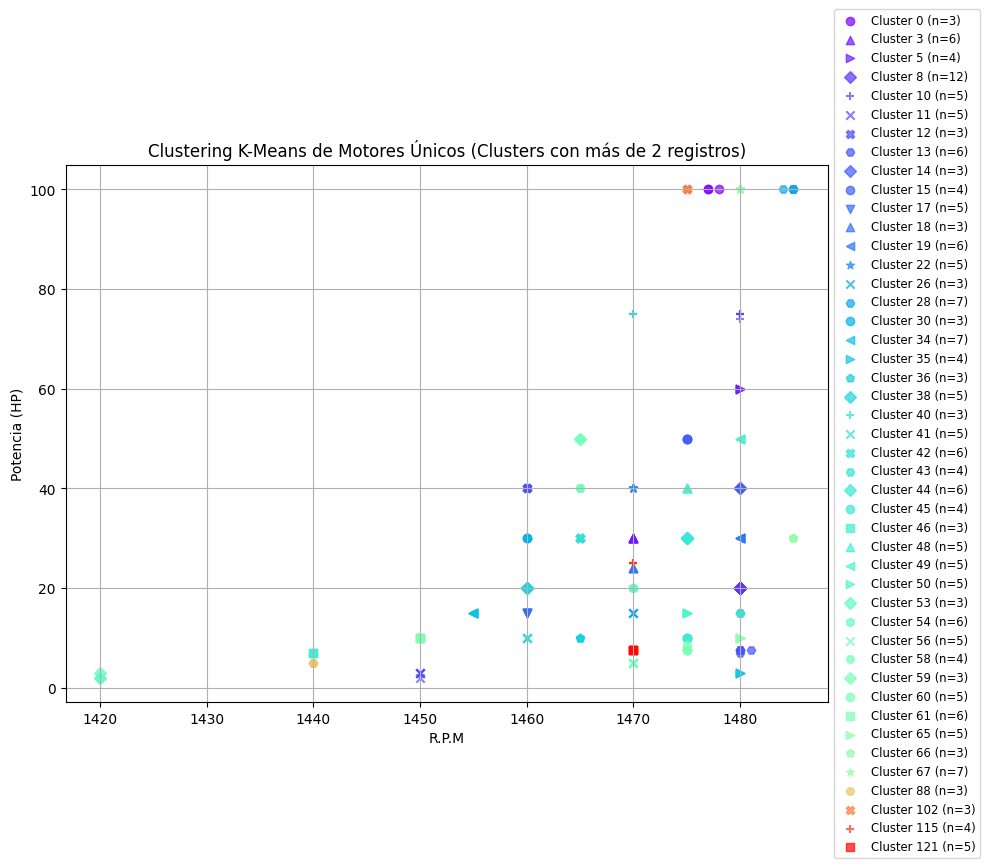

In [38]:
plt.figure(figsize=(10, 8))

# Usar un mapa de colores con más variedad
cmap = plt.get_cmap('rainbow', 123)

# Usar diferentes marcadores
markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', 'D', 'h', '+', 'x','X','H','D']
for cluster in range(123):
    cluster_data = motores_unicos[motores_unicos['Cluster'] == cluster]
    # Calcula la cantidad de registros en el cluster actual
    cluster_size = len(cluster_data)

    # Mostrar solo los clusters con más de 2 registros
    if cluster_size > 2:
        plt.scatter(cluster_data['R.P.M'], cluster_data['POTENCIA (HP)'],
                    c=[cmap(cluster)], label=f'Cluster {cluster} (n={cluster_size})',  # Agrega la cantidad de registros a la etiqueta
                    marker=markers[cluster % len(markers)], alpha=0.7)

plt.xlabel('R.P.M')
plt.ylabel('Potencia (HP)')
plt.title('Clustering K-Means de Motores Únicos (Clusters con más de 2 registros)')
plt.grid(True)  # Agregar una cuadrícula

# Colocar la leyenda al lado derecho del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=1)  # Leyenda al lado del gráfico

plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

GRAFICO 3D

In [41]:

# Ajustar y transformar la columna 'FRAME' a una representación numérica
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()
# Ajustar y transformar la columna 'FRAME' a una representación numérica
motores_unicos['FRAME_codificado'] = le.fit_transform(motores_unicos['FRAME'])

<ipython-input-42-ac9e42656308>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', 123)  # Puedes usar otro mapa de colores


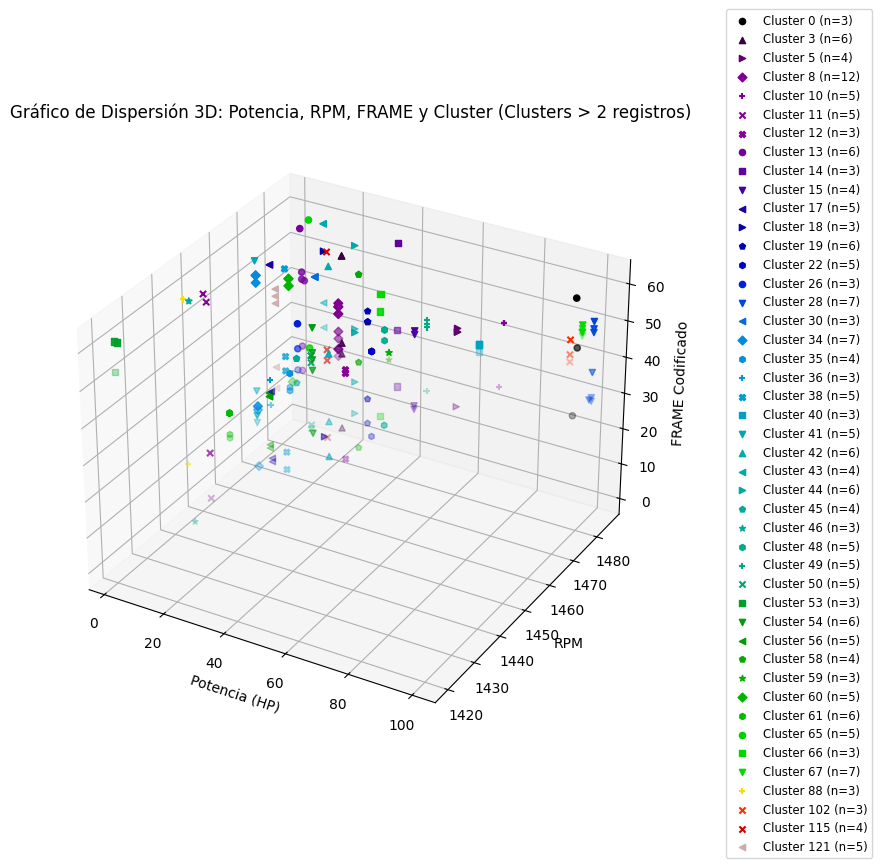

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Lista de marcadores y colores para cada cluster
#markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', 'D', 'h']
markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', 'D', 'h', '+', 'x','X']
colors = plt.cm.get_cmap('nipy_spectral', 123)  # Puedes usar otro mapa de colores

for cluster in range(123):
    cluster_data = motores_unicos[motores_unicos['Cluster'] == cluster]
    cluster_size = len(cluster_data)

    if cluster_size > 2:
        ax.scatter(cluster_data['POTENCIA (HP)'],
                   cluster_data['R.P.M'],
                   cluster_data['FRAME_codificado'],
                   c=[colors(cluster)],
                   marker=markers[cluster % len(markers)],
                   label=f'Cluster {cluster} (n={cluster_size})')  # Agrega la cantidad de registros a la etiqueta
ax.set_xlabel('Potencia (HP)')
ax.set_ylabel('RPM')
ax.set_zlabel('FRAME Codificado')

# Agregar leyenda para los clusters
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', ncol=1)  # Leyenda al lado del gráfico

plt.title('Gráfico de Dispersión 3D: Potencia, RPM, FRAME y Cluster (Clusters > 2 registros)')

plt.show()

# EVALUACIÓN ESTADISTICA DEL AGRUPAMIENTO DE DATOS

In [43]:
#cuantos cluster tienen solo un registro(motores que no fueron posibles agrupar)

# Contar la cantidad de clusters con solo un registro
cluster_counts = motores_unicos['Cluster'].value_counts()
clusters_with_one_record = (cluster_counts == 1).sum()

print(f"Hay {clusters_with_one_record} clusters con solo un registro.")

Hay 46 clusters con solo un registro.


In [44]:
#cuantos cluster tienen solo 2 registros

# Contar la cantidad de clusters con solo un registro
cluster_counts = motores_unicos['Cluster'].value_counts()
clusters_with_two_record = (cluster_counts == 2).sum()

print(f"Hay {clusters_with_two_record} clusters con solo dos registros.")

Hay 32 clusters con solo dos registros.


In [45]:
# Contar la cantidad de clusters con una cantidad específica de registros
cluster_counts = motores_unicos['Cluster'].value_counts()

for i in range(1, 13):  # Verificar hasta clusters con 9 registros (puedes ajustar el rango)
  count = (cluster_counts == i).sum()
  print(f"Clustercon {i} registro(s): {count}")


Clustercon 1 registro(s): 46
Clustercon 2 registro(s): 32
Clustercon 3 registro(s): 14
Clustercon 4 registro(s): 7
Clustercon 5 registro(s): 13
Clustercon 6 registro(s): 7
Clustercon 7 registro(s): 3
Clustercon 8 registro(s): 0
Clustercon 9 registro(s): 0
Clustercon 10 registro(s): 0
Clustercon 11 registro(s): 0
Clustercon 12 registro(s): 1


In [46]:
# Crear una lista para almacenar las estadísticas de cada cluster
cluster_stats_list = []

for cluster_num in range(123):  # Iterar a través de todos los clusters
  cluster_data = motores_unicos[motores_unicos['Cluster'] == cluster_num]
  cluster_size = len(cluster_data)

  if cluster_size > 2:
    rpm_variance = cluster_data['R.P.M'].var()
    rpm_std_dev = cluster_data['R.P.M'].std()
    power_variance = cluster_data['POTENCIA (HP)'].var()
    power_std_dev = cluster_data['POTENCIA (HP)'].std()

    cluster_stats_list.append([
        cluster_num, cluster_size, rpm_variance, rpm_std_dev, power_variance,
        power_std_dev
    ])

# Crear un DataFrame con las estadísticas de cada cluster
cluster_stats_df = pd.DataFrame(
    cluster_stats_list,
    columns=[
        'Cluster', 'Tamaño', 'Varianza RPM', 'Desviación Estándar RPM',
        'Varianza Potencia', 'Desviación Estándar Potencia'
    ])

# Imprimir la tabla de métricas estadísticas de todos los clusters con más de 2 registros
print(
    tabulate(cluster_stats_df,
             headers='keys',
             tablefmt='fancy_grid',
             floatfmt=".4f"))

╒════╤═══════════╤══════════╤════════════════╤═══════════════════════════╤═════════════════════╤════════════════════════════════╕
│    │   Cluster │   Tamaño │   Varianza RPM │   Desviación Estándar RPM │   Varianza Potencia │   Desviación Estándar Potencia │
╞════╪═══════════╪══════════╪════════════════╪═══════════════════════════╪═════════════════════╪════════════════════════════════╡
│  0 │    0.0000 │   3.0000 │         0.3333 │                    0.5774 │              0.0000 │                         0.0000 │
├────┼───────────┼──────────┼────────────────┼───────────────────────────┼─────────────────────┼────────────────────────────────┤
│  1 │    3.0000 │   6.0000 │         0.0000 │                    0.0000 │              0.0000 │                         0.0000 │
├────┼───────────┼──────────┼────────────────┼───────────────────────────┼─────────────────────┼────────────────────────────────┤
│  2 │    5.0000 │   4.0000 │         0.0000 │                    0.0000 │              0.

In [47]:
# Contar cuántos motores tienen desviación estándar y varianza 0 en RPM y Potencia
motores_cero_desv_var = cluster_stats_df[
    (cluster_stats_df['Desviación Estándar RPM'] == 0) &
    (cluster_stats_df['Desviación Estándar Potencia'] == 0) &
    (cluster_stats_df['Varianza RPM'] == 0) &
    (cluster_stats_df['Varianza Potencia'] == 0)
]
cantidad_motores_cero_desv_var = len(motores_cero_desv_var)

# Contar cuántos motores NO tienen desviación estándar y varianza 0 en RPM y Potencia
motores_no_cero_desv_var = cluster_stats_df[
    (cluster_stats_df['Desviación Estándar RPM'] != 0) |
    (cluster_stats_df['Desviación Estándar Potencia'] != 0) |
    (cluster_stats_df['Varianza RPM'] != 0) |
    (cluster_stats_df['Varianza Potencia'] != 0)
]
cantidad_motores_no_cero_desv_var = len(motores_no_cero_desv_var)

# Crear una tabla resumen
tabla_resumen = pd.DataFrame({
    'Descripción': ['Grupos con desviación y varianza 0', 'Grupos con desviación y/o varianza diferente de 0'],
    'Cantidad': [cantidad_motores_cero_desv_var, cantidad_motores_no_cero_desv_var]
})

# Imprimir la tabla resumen
print(tabulate(tabla_resumen, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════════════════════════════════════════╤════════════╕
│    │ Descripción                                       │   Cantidad │
╞════╪═══════════════════════════════════════════════════╪════════════╡
│  0 │ Grupos con desviación y varianza 0                │         38 │
├────┼───────────────────────────────────────────────────┼────────────┤
│  1 │ Grupos con desviación y/o varianza diferente de 0 │          7 │
╘════╧═══════════════════════════════════════════════════╧════════════╛


In [48]:
# prompt: sacar promedio de desviacion estandar

# Calcular el promedio de la desviación estándar de RPM y Potencia para todos los clusters
promedio_desv_estandar_rpm = cluster_stats_df['Desviación Estándar RPM'].mean()
promedio_desv_estandar_potencia = cluster_stats_df['Desviación Estándar Potencia'].mean()

print(f"Promedio de la desviación estándar de RPM: {promedio_desv_estandar_rpm:.4f}")
print(f"Promedio de la desviación estándar de Potencia: {promedio_desv_estandar_potencia:.4f}")

Promedio de la desviación estándar de RPM: 0.0303
Promedio de la desviación estándar de Potencia: 0.0472


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

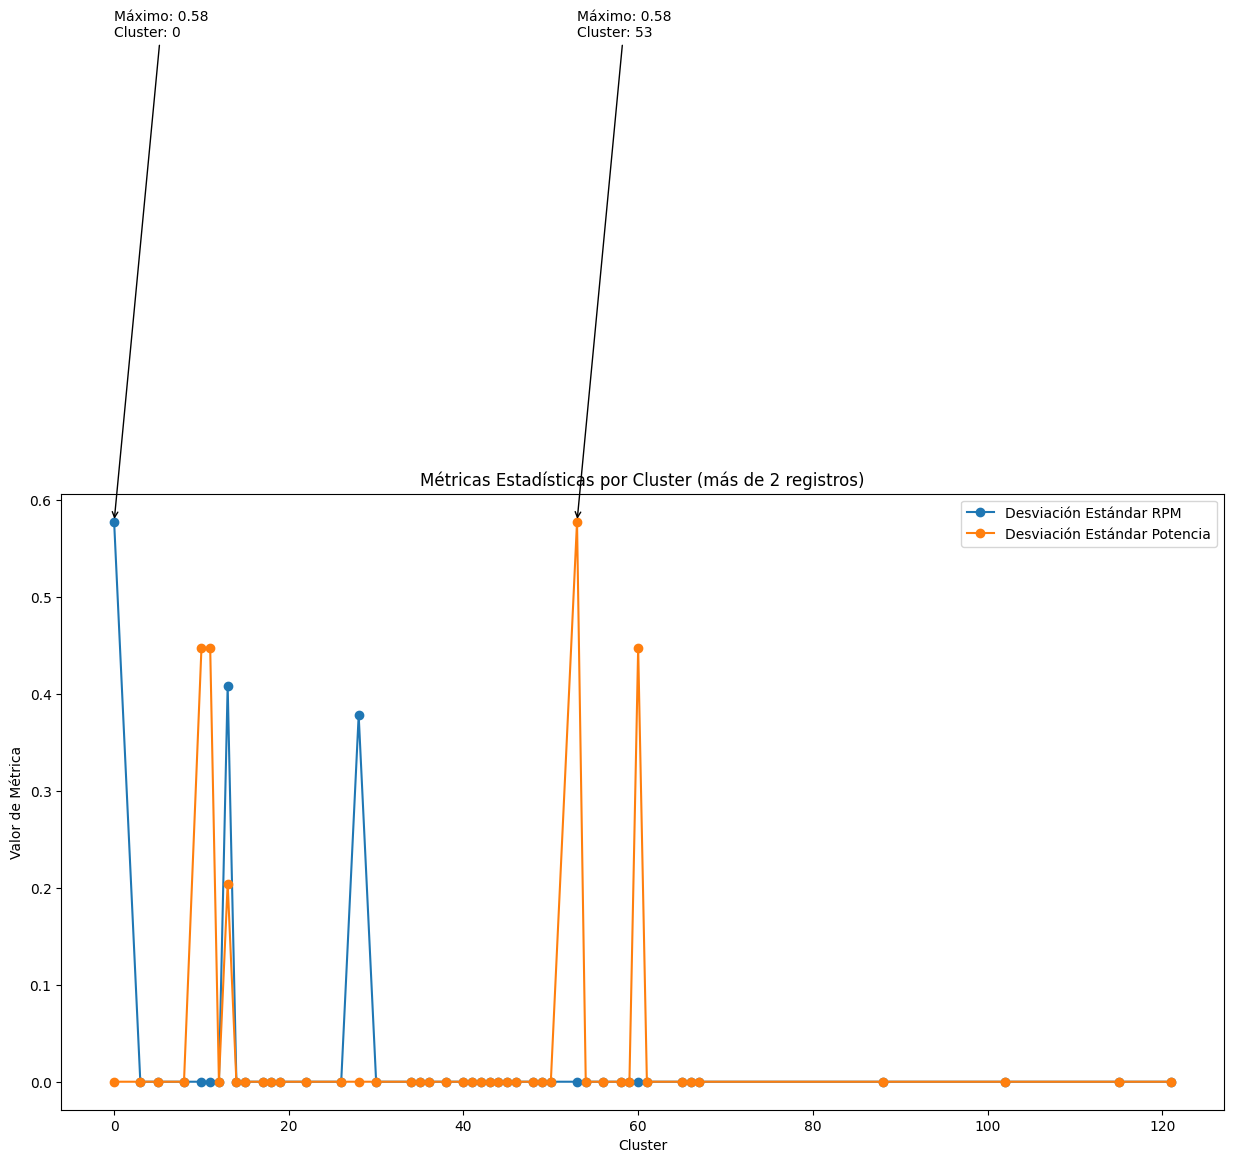

In [49]:
# Crear gráfico de líneas
plt.figure(figsize=(15, 8))

# Gráficas de línea para cada métrica
plt.plot(cluster_stats_df['Cluster'], cluster_stats_df['Desviación Estándar RPM'], label='Desviación Estándar RPM', marker='o')
plt.plot(cluster_stats_df['Cluster'], cluster_stats_df['Desviación Estándar Potencia'], label='Desviación Estándar Potencia', marker='o')

# Encontrar máximos y sus índices
max_rpm_std = cluster_stats_df['Desviación Estándar RPM'].max()
max_rpm_std_cluster = cluster_stats_df['Cluster'][cluster_stats_df['Desviación Estándar RPM'].idxmax()]

max_power_std = cluster_stats_df['Desviación Estándar Potencia'].max()
max_power_std_cluster = cluster_stats_df['Cluster'][cluster_stats_df['Desviación Estándar Potencia'].idxmax()]

# Etiquetar los máximos
plt.annotate(f'Máximo: {max_rpm_std:.2f}\nCluster: {max_rpm_std_cluster}',
             xy=(max_rpm_std_cluster, max_rpm_std),
             xytext=(max_rpm_std_cluster, max_rpm_std + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Máximo: {max_power_std:.2f}\nCluster: {max_power_std_cluster}',
             xy=(max_power_std_cluster, max_power_std),
             xytext=(max_power_std_cluster, max_power_std + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Etiquetas y leyendas
plt.xlabel('Cluster')
plt.ylabel('Valor de Métrica')
plt.title('Métricas Estadísticas por Cluster (más de 2 registros)')
plt.legend()
plt

In [50]:
#cantidad de registros por cluster y ordenar cantidades de mayor a menor

# Contar la cantidad de registros por cluster y ordenarlos de mayor a menor
cluster_counts = motores_unicos['Cluster'].value_counts().sort_values(ascending=False)

# Imprimir la tabla de conteo de clusters
print(tabulate(cluster_counts.reset_index().rename(columns={'index': 'Cluster', 'Cluster': 'Cluster'}), headers='keys', tablefmt='fancy_grid'))


╒═════╤═══════════╤═════════╕
│     │   Cluster │   count │
╞═════╪═══════════╪═════════╡
│   0 │         8 │      12 │
├─────┼───────────┼─────────┤
│   1 │        28 │       7 │
├─────┼───────────┼─────────┤
│   2 │        67 │       7 │
├─────┼───────────┼─────────┤
│   3 │        34 │       7 │
├─────┼───────────┼─────────┤
│   4 │        42 │       6 │
├─────┼───────────┼─────────┤
│   5 │        44 │       6 │
├─────┼───────────┼─────────┤
│   6 │        61 │       6 │
├─────┼───────────┼─────────┤
│   7 │         3 │       6 │
├─────┼───────────┼─────────┤
│   8 │        13 │       6 │
├─────┼───────────┼─────────┤
│   9 │        54 │       6 │
├─────┼───────────┼─────────┤
│  10 │        19 │       6 │
├─────┼───────────┼─────────┤
│  11 │        65 │       5 │
├─────┼───────────┼─────────┤
│  12 │        17 │       5 │
├─────┼───────────┼─────────┤
│  13 │        38 │       5 │
├─────┼───────────┼─────────┤
│  14 │        49 │       5 │
├─────┼───────────┼─────────┤
│  15 │   

DESCARGAR DATA

In [51]:
# Descargar motores únicos con la columna 'Cluster' incluida
motores_unicos.to_excel('motores_unicos_con_cluster.xlsx', index=False)  # Ajusta el nombre del archivo si lo deseas
from google.colab import files
files.download('motores_unicos_con_cluster.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>